## Check Cousins

Given the binary Tree and two nodes say ‘p’ and ‘q’. Determine whether the two nodes are cousins of each other or not. Two nodes are said to be cousins of each other if they are at same level of the Binary Tree and have different parents.

Do it in O(n).

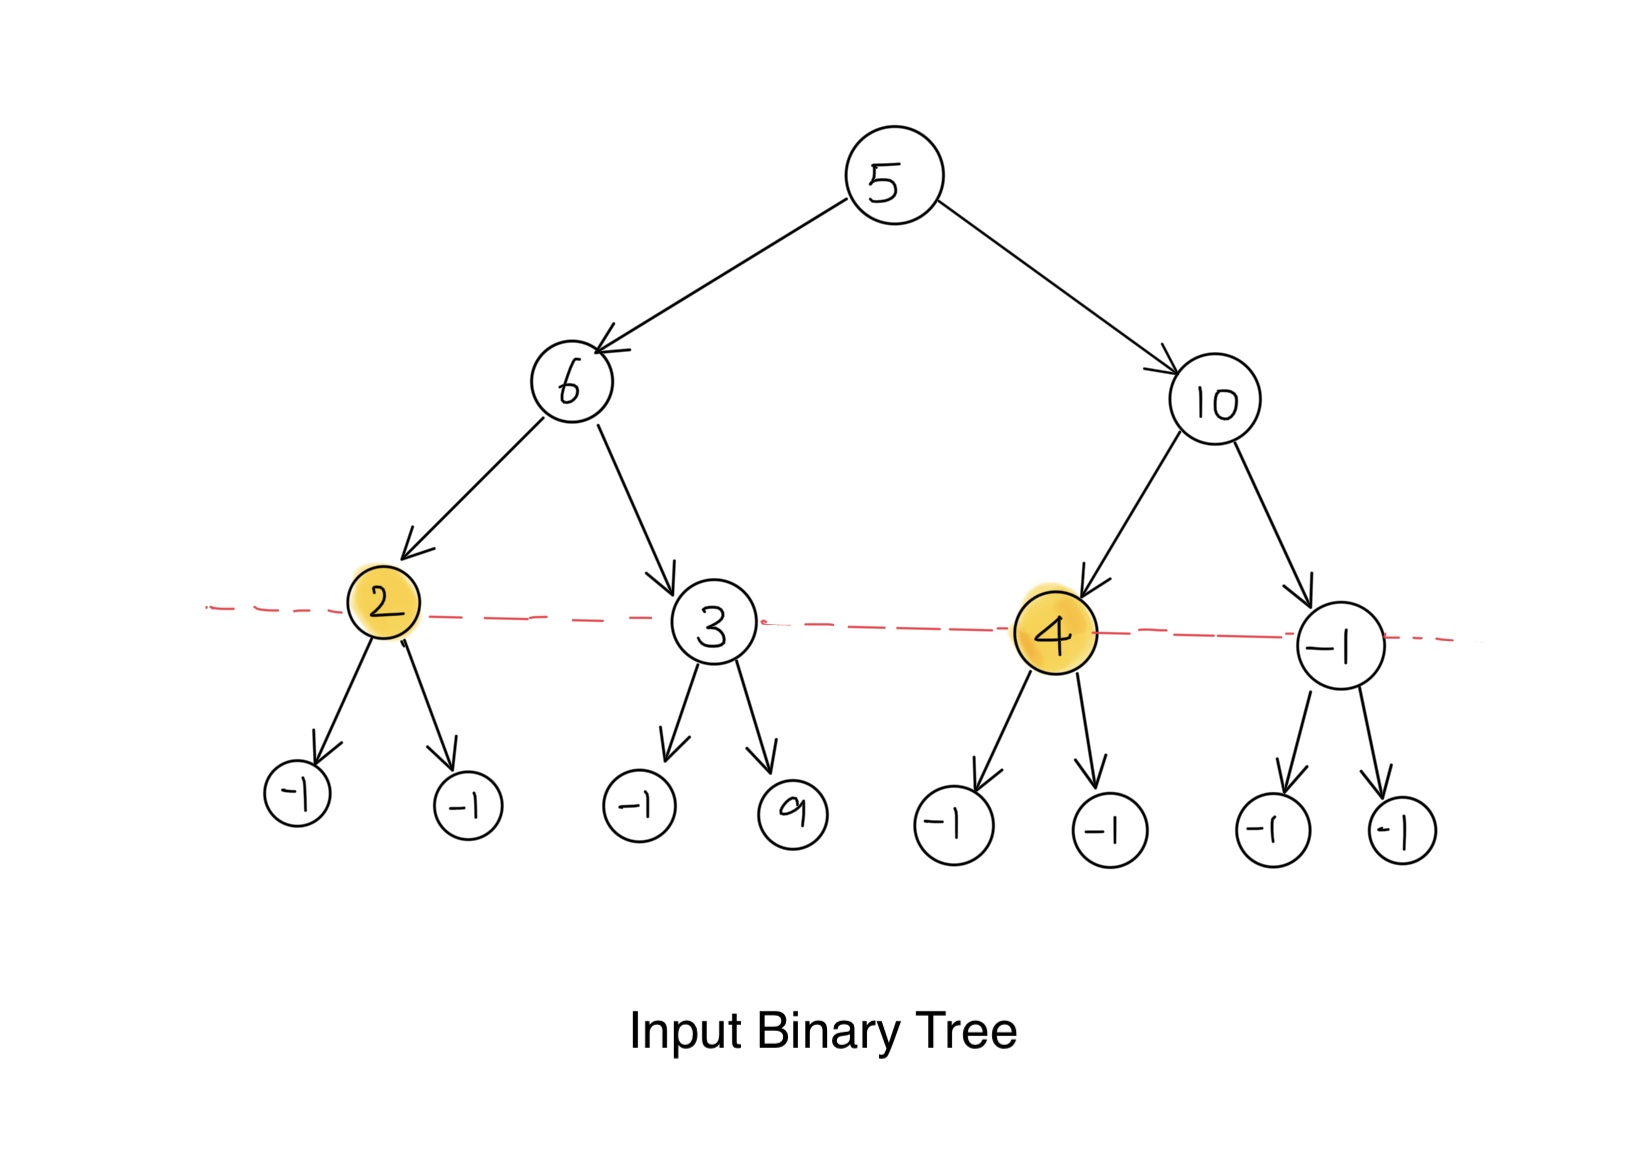

In [ ]:
## Read input as specified in the question.
## Print output as specified in the question.
import queue
class BinaryTreeNode:
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None

class Helper:
  def __init__(self):
    self.pFound = False
    self.qFound = False
    self.pDepth = -1
    self.qDepth = -1
    self.pParent = -1
    self.qParent = -1

h = Helper()

def checkCousins(root, p, q, parent = -1, depth = 0):
  if root == None:
    return

  if root.data == p:
    h.pFound = True
    h.pDepth = depth
    h.pParent = parent
  if root.data == q:
    h.qFound = True
    h.qDepth = depth
    h.qParent = parent


  checkCousins(root.left, p, q, root.data, depth+1)
  checkCousins(root.right, p, q, root.data, depth+1)

def buildLevelTree(levelorder):
    index = 0
    length = len(levelorder)
    if length<=0 or levelorder[0]==-1:
        return None
    root = BinaryTreeNode(levelorder[index])
    index += 1
    q = queue.Queue()
    q.put(root)
    while not q.empty():
        currentNode = q.get()
        leftChild = levelorder[index]
        index += 1
        if leftChild != -1:
            leftNode = BinaryTreeNode(leftChild)
            currentNode.left =leftNode
            q.put(leftNode)
        rightChild = levelorder[index]
        index += 1
        if rightChild != -1:
            rightNode = BinaryTreeNode(rightChild)
            currentNode.right =rightNode
            q.put(rightNode)
    return root

# Main
levelOrder = [int(i) for i in input().strip().split()]
root = buildLevelTree(levelOrder)
p = int(input())
q = int(input())
checkCousins(root,p,q)
if (h.pDepth == h.qDepth) and (h.pParent != h.qParent):
    print('true')
else:
    print('false')

## Longest Leaf to Root Path

Given a binary tree, return the longest path from leaf to root. Longest means, a path which contain maximum number of nodes from leaf to root.

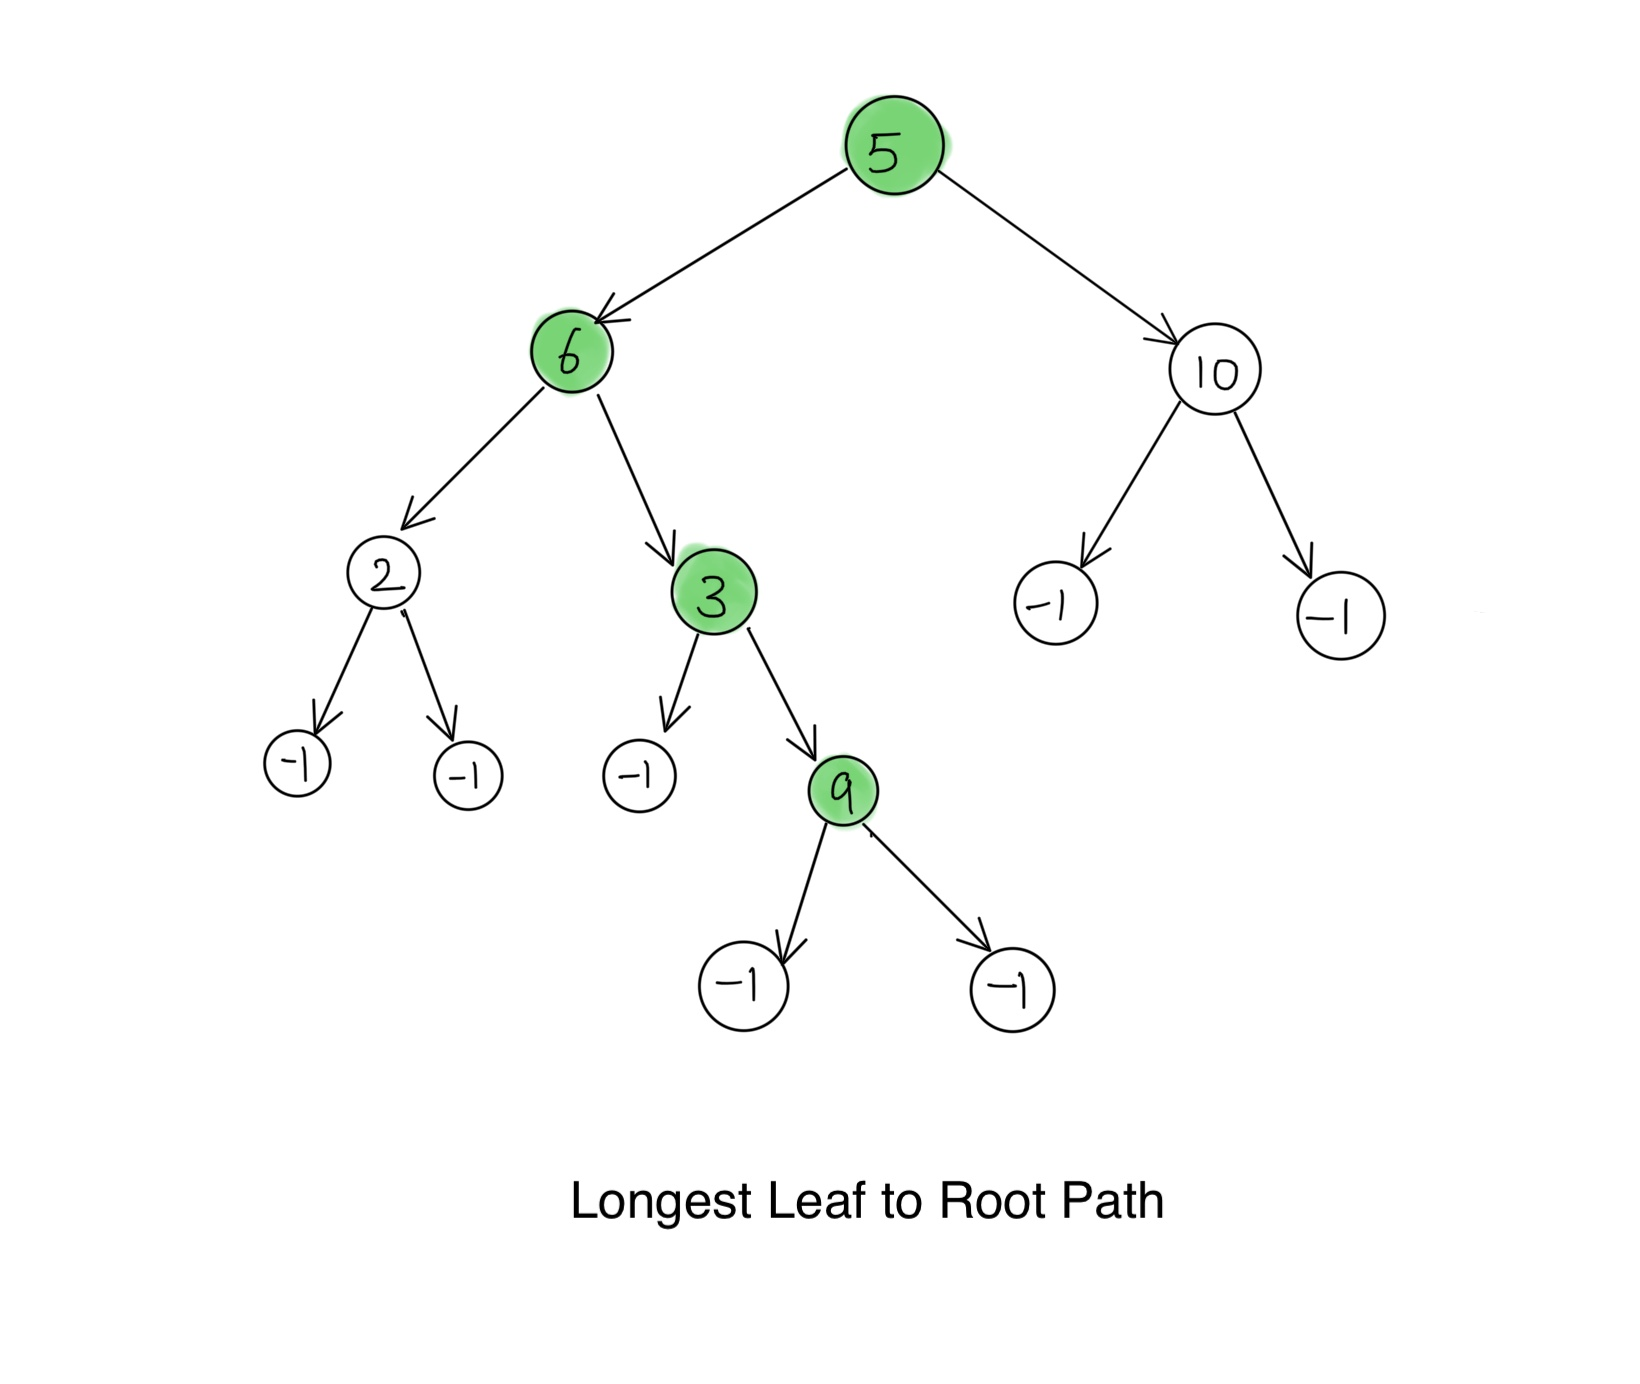

### Self

In [ ]:
import queue

class BinaryTreeNode:
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None

class Helper:
    def __init__(self):
        self.maxPathLength = float('-inf')
        self.maxPath = []

h = Helper()

def longestPath(root, depth=0, path=[]):
    if root is None:
        return

    # If it's a leaf node
    if root.left is None and root.right is None:
        if depth > h.maxPathLength:
            # Update maxPath and maxPathLength
            h.maxPathLength = depth
            h.maxPath = path + [root.data]
            return

    # Recursively traverse left and right subtrees
    longestPath(root.left, depth + 1, path + [root.data])
    longestPath(root.right, depth + 1, path + [root.data])

def buildLevelTree(levelorder):
    index = 0
    length = len(levelorder)
    if length <= 0 or levelorder[0] == -1:
        return None
    root = BinaryTreeNode(levelorder[index])
    index += 1
    q = queue.Queue()
    q.put(root)
    while not q.empty():
        currentNode = q.get()
        leftChild = levelorder[index]
        index += 1
        if leftChild != -1:
            leftNode = BinaryTreeNode(leftChild)
            currentNode.left = leftNode
            q.put(leftNode)
        rightChild = levelorder[index]
        index += 1
        if rightChild != -1:
            rightNode = BinaryTreeNode(rightChild)
            currentNode.right = rightNode
            q.put(rightNode)
    return root

# Main
levelOrder = [int(i) for i in input().strip().split()]
root = buildLevelTree(levelOrder)
if root is not None:
    longestPath(root)
if h.maxPath:
    print(*h.maxPath[::-1], sep='\n')

## Remove Leaf Nodes in Tree

Remove all leaf nodes from a given generic Tree. Leaf nodes are those nodes, which don't have any children.

Note : Root will also be a leaf node if it doesn't have any child. You don't need to print the tree, just remove all leaf nodes and return the updated root.

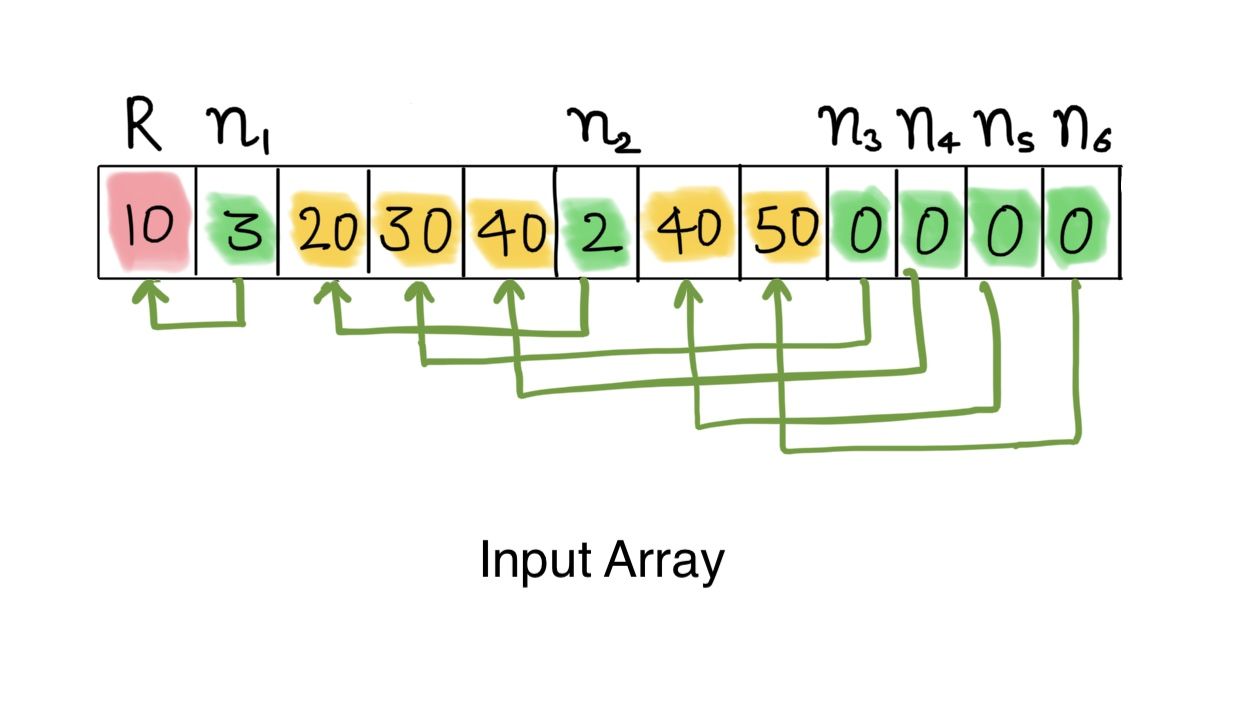

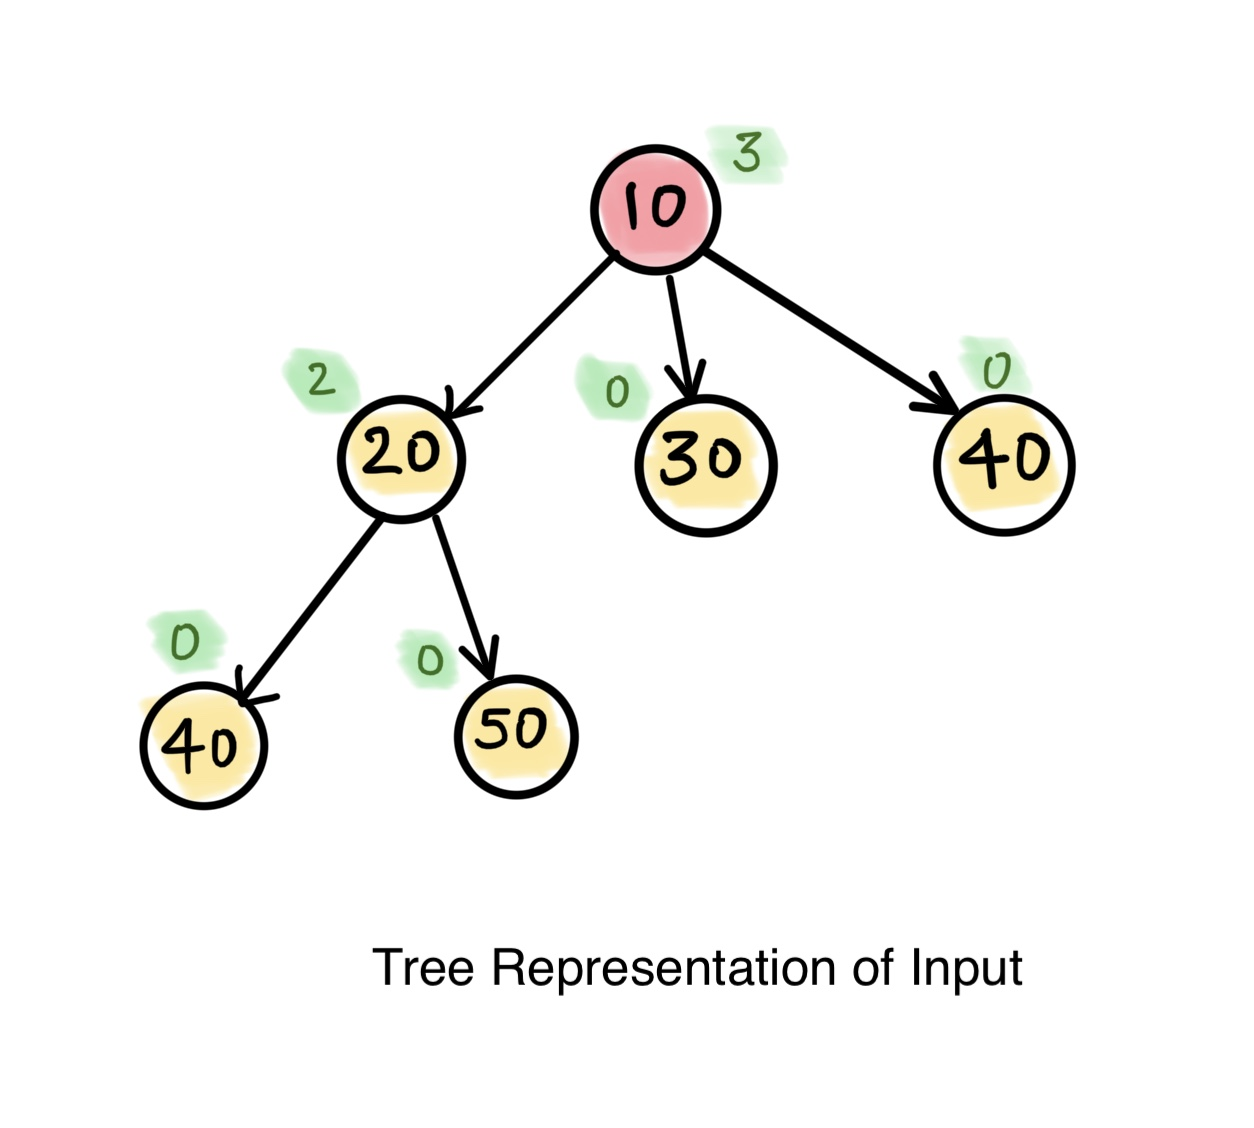

In [ ]:
import queue
class treeNode:
    def __init__(self, data):
        self.data = data
        self.children = []
    def __str__(self):
        return str(self.data)

def removeLeafNodes(root):
  if root == None:
    return

  if root.children == []:
    root.data = ''
    return

  [removeLeafNodes(child) for child in root.children]


def createLevelWiseTree(arr):
    root = treeNode(int(arr[0]))
    q = [root]
    size = len(arr)
    i = 1
    while i<size:
        parent = q.pop(0)
        childCount = int(arr[i])
        i += 1
        for j in range(0,childCount):
            temp = treeNode(int(arr[i+j]))
            parent.children.append(temp)
            q.append(temp)
        i += childCount
    return root

def printLevelWiseTree(root):
    q = queue.Queue()
    q.put(root)
    q.put(None)

    while q.empty() is False:
        front = q.get()
        if front is None:
            if q.empty():
                return
            else:
                print()
                q.put(None)
        elif front.data != '':
            print(front.data,end= ' ')
            for child in front.children:
                q.put(child)




# Main
arr = list(int(x) for x in input().strip().split(' '))
root = createLevelWiseTree(arr)
removeLeafNodes(root)
printLevelWiseTree(root)